# Plotting Training & Validation Metrics for GNN Track Matching

In [1]:
import sys
import numpy as np

SOFTWARE_DIR = '/sdf/data/neutrino/software/spine/' # Change this path to your software install
DATA_DIR = '/sdf/home/j/jessicam/Mx2/data/validate/' # Change this path if you are not on SDF (see main README)

# Set software directory
sys.path.append(SOFTWARE_DIR)

# Reading Training Logs

In [4]:
import pandas as pd

path="/sdf/home/j/jessicam/Mx2/logs/grappa/"
f1="train_log-0000000.csv"
df1 = pd.read_csv(path+f1)
df = df1

#If you have stopped/continued training, load all logs
#f2="train_log-0001700.csv"
#f3="train_log-0003500.csv"
#df2 = pd.read_csv(path+f2)
#df3 = pd.read_csv(path+f3)
#df = pd.concat([df1, df2, df3], ignore_index=True)

df

,iter,epoch,first_entry,cpu_mem,cpu_mem_perc,gpu_mem,gpu_mem_perc,iteration_time,iteration_time_cpu,iteration_time_sum,...,model_backward_time_sum_cpu,model_save_time,model_save_time_cpu,model_save_time_sum,model_save_time_sum_cpu,edge_accuracy,edge_loss,edge_count,loss,accuracy
0,0,0.002268,7877,21.076996,2.6,0.018738,0.022051,14.137878,13.942940,14.137878,...,0.038464,0.000006,0.000006,0.000006,0.000006,0.340860,0.814629,930,0.814629,0.340860
1,1,0.004535,13605,21.077365,2.6,0.018738,0.022051,0.231464,0.187155,14.369342,...,0.046243,0.000006,0.000006,0.000012,0.000012,0.361570,0.766734,484,0.766734,0.361570
2,2,0.006803,9381,21.077529,2.6,0.018738,0.022051,0.139584,0.138332,14.508926,...,0.053929,0.000005,0.000005,0.000017,0.000017,0.414747,0.731362,434,0.731362,0.414747
3,3,0.009070,997,21.077303,2.6,0.018738,0.022051,0.172460,0.170241,14.681386,...,0.062104,0.000005,0.000005,0.000023,0.000022,0.446128,0.710662,594,0.710662,0.446128
4,4,0.011338,11493,21.078139,2.6,0.018738,0.022051,0.168990,0.167607,14.850375,...,0.070220,0.000005,0.000005,0.000028,0.000027,0.509740,0.687669,616,0.687669,0.509740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1759,3.990930,11320,21.022114,2.6,0.022072,0.025975,0.140981,0.140102,300.022043,...,14.157570,0.000005,0.000005,0.396518,0.376707,0.987552,0.048543,482,0.048543,0.987552
1760,1760,3.993197,10104,21.022015,2.6,0.022072,0.025975,0.172932,0.171772,300.194974,...,14.165724,0.000005,0.000005,0.396523,0.376712,0.985484,0.026075,620,0.026075,0.985484
1761,1761,3.995465,11384,21.022081,2.6,0.022072,0.025975,0.173679,0.172491,300.368654,...,14.173920,0.000005,0.000005,0.396528,0.376718,0.995327,0.013984,642,0.013984,0.995327
1762,1762,3.997732,3320,21.021848,2.6,0.022072,0.025975,0.159607,0.158688,300.528261,...,14.182076,0.000005,0.000005,0.396533,0.376723,0.981949,0.036592,554,0.036592,0.981949


Let's take look at the keys, specifically:

<Axes: xlabel='iter'>

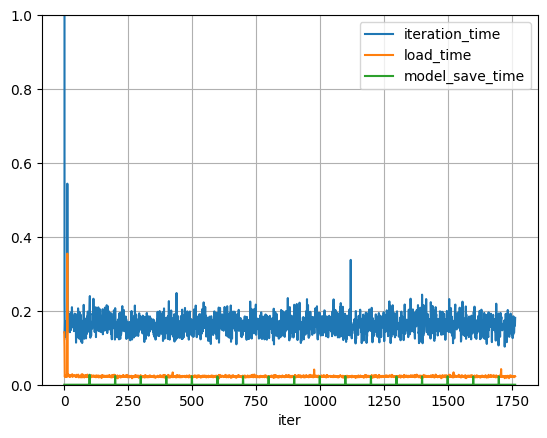

In [5]:
df.plot('iter', ['iteration_time', 'load_time', 'model_save_time'], ylim=[0,1.0], grid=True) #seconds

14.137877941131592 5.011818869908651 1763 0.16254750666669737


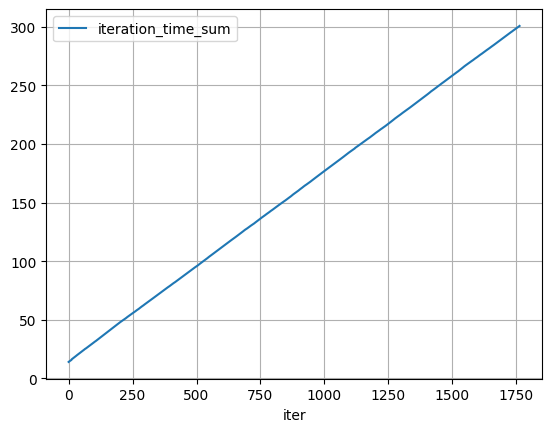

In [6]:
df.plot('iter', 'iteration_time_sum',grid=True)
iter1 = df1['iter'][len(df1['iter'])-1]
avg1 = df1['iteration_time'][1:].sum()/iter1
print(df1['iteration_time'][0],df1['iteration_time_sum'].max()/60,iter1,avg1)

<Axes: xlabel='iter'>

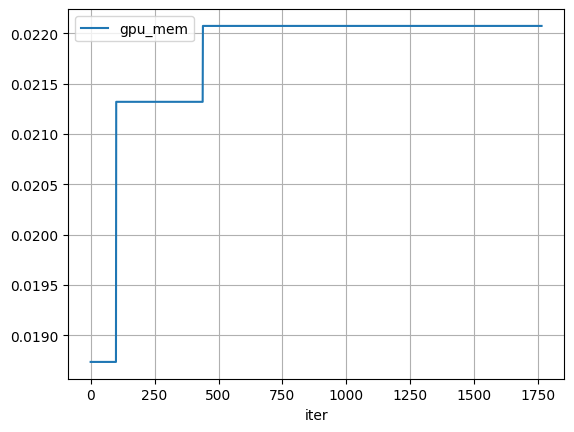

In [10]:
df.plot('iter', 'gpu_mem', grid=True)

### Use this to get loading time/statistics with 3 log files

In [5]:
#If there is multiple log files, combine to get the total time
iter1 = df1['iter'][len(df1['iter'])-1]
iter2 = df2['iter'][len(df2['iter'])-1]-df1['iter'][len(df1['iter'])-1]
iter3 = df3['iter'][len(df3['iter'])-1]-df2['iter'][len(df2['iter'])-1]
avg1 = df1['iteration_time'][1:].sum()/iter1 #Exclude first since it has to load
avg2 = df2['iteration_time'][1:].sum()/iter2 #Exclude first since it has to load
avg3 = df3['iteration_time'][1:].sum()/iter3 #Exclude first since it has to load
print("First iteration time (with load)", "max iteration time", "total number iterations", "average time (without load")
print(df1['iteration_time'][0],df1['iteration_time_sum'].max(),iter1,avg1) 
print(df2['iteration_time'][0],df2['iteration_time_sum'].max(),iter2,avg2)
print(df3['iteration_time'][0],df3['iteration_time_sum'].max(),iter3,avg3)
print((df1['iteration_time_sum'].max()+df2['iteration_time_sum'].max()+df3['iteration_time_sum'].max())/60)

14.137877941131592 300.70913219451904 1763 0.16254750666669737
2.582764148712158 342.5111973285675 1764 0.1927031934126164
10.663180112838743 681.5663163661957 3528 0.1901652880536726
22.079777431488036


# Reading Validation vs. Iteration Progress

In [11]:
import glob

#Validation run at each specific iterations
#Load them all to get an interference vs. selected iteration
val_files = glob.glob('logs_bs64/grappa/inference*')
print(val_files)

['logs_bs64/grappa/inference_log-0000200.csv', 'logs_bs64/grappa/inference_log-0002500.csv', 'logs_bs64/grappa/inference_log-0002400.csv', 'logs_bs64/grappa/inference_log-0000300.csv', 'logs_bs64/grappa/inference_log-0002800.csv', 'logs_bs64/grappa/inference_log-0001800.csv', 'logs_bs64/grappa/inference_log-0002300.csv', 'logs_bs64/grappa/inference_log-0003100.csv', 'logs_bs64/grappa/inference_log-0001700.csv', 'logs_bs64/grappa/inference_log-0001100.csv', 'logs_bs64/grappa/inference_log-0002600.csv', 'logs_bs64/grappa/inference_log-0001300.csv', 'logs_bs64/grappa/inference_log-0002000.csv', 'logs_bs64/grappa/inference_log-0000900.csv', 'logs_bs64/grappa/inference_log-0001600.csv', 'logs_bs64/grappa/inference_log-0001000.csv', 'logs_bs64/grappa/inference_log-0000500.csv', 'logs_bs64/grappa/inference_log-0003200.csv', 'logs_bs64/grappa/inference_log-0001200.csv', 'logs_bs64/grappa/inference_log-0001500.csv', 'logs_bs64/grappa/inference_log-0002900.csv', 'logs_bs64/grappa/inference_log-0

In [ ]:
iterations = [int(f.split('-')[-1][:7]) for f in val_files]
#epochs = [(4/1764.)*i for i in iterations]
epochs = [(16/3520.)*i for i in iterations]
losses = [pd.read_csv(f).loss.mean() for f in val_files]
stds = [pd.read_csv(f).loss.std() for f in val_files]
accuracys = [pd.read_csv(f).accuracy.mean() for f in val_files]
astds = [pd.read_csv(f).accuracy.std() for f in val_files]
#print(iterations, epochs)
#print(losses)
print(min(losses), max(accuracys),np.argmin(losses),np.argmax(accuracys),
      epochs[np.argmax(accuracys)],iterations[np.argmax(accuracys)])

### Plot Training and Validation Progress

<Figure size 1500x1500 with 0 Axes>

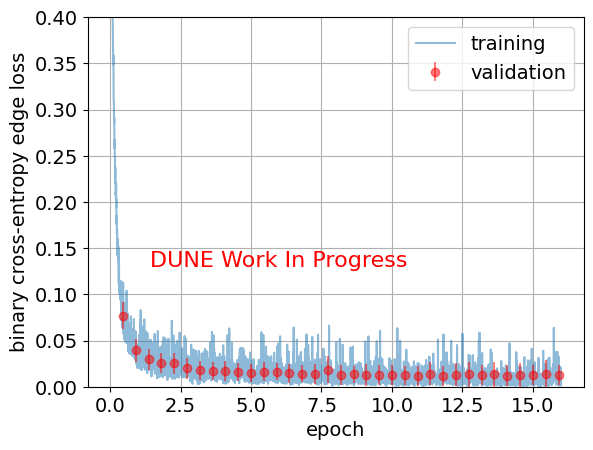

In [34]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
df.plot('epoch', 'loss', ylim=[0,0.4], grid=True,label="training",alpha=0.5)
plt.errorbar(epochs, losses, yerr=stds, fmt='o', color="red",alpha=0.5, label='validation')
plt.legend(fontsize=14)
plt.ylabel("binary cross-entropy edge loss",fontsize=14)
plt.xlabel("epoch",fontsize=14)
#plt.text(1.4, .13, 'DUNE Work In Progress', fontsize=16, color='red') #Need for official plots
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig("plots/loss_"+str(max(epochs))+".png",dpi=300,bbox_inches="tight")

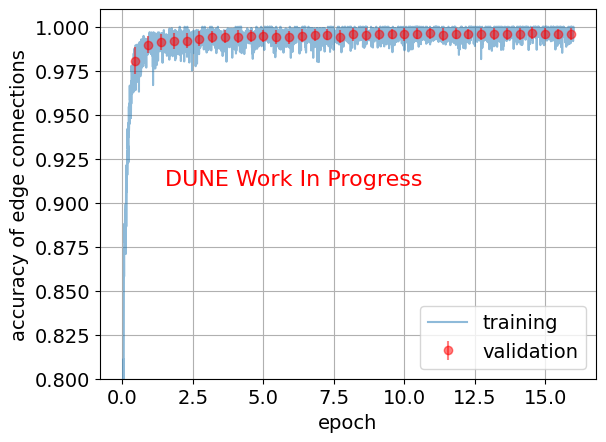

In [35]:
df.plot('epoch', 'accuracy', ylim=[0.8,1.01], grid=True,label="training",alpha=0.5)
plt.errorbar(epochs, accuracys, yerr=astds, fmt='o', color="red",alpha=0.5, label='validation')
plt.legend(fontsize=14)
plt.ylabel("accuracy of edge connections",fontsize=14)
plt.xlabel("epoch",fontsize=14)
#plt.text(1.5, .91, 'DUNE Work In Progress', fontsize=16, color='red') #Need for official plots
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig("plots/accuracy_"+str(max(epochs))+".png",dpi=300,bbox_inches="tight")

# Run Inference on Best Epoch and Save Output

### Write output to hdf5 -- Only need to run this once to use for input for next section, use the cfg to direct code to which inference/validation weights to load and use here

In [ ]:
import yaml
from spine.driver import Driver

# Load configuration file of the ML chain
cfg_path = '/n/holystore01/LABS/iaifi_lab/Users/jmicallef/configs/validation_grappa_writer.cfg'
cfg = yaml.load(open(cfg_path, 'r'), Loader=yaml.Loader)

driver = Driver(cfg)

In [ ]:
data = driver.process()

In [3]:
driver.run()

Calling function for loss key: edge_loss
Iter. 0 (epoch 0.008) @ 2024-08-12 18:44:25
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.47 s (58.53 %)    | 21.88 GB (5.40 %)   | 0.013    | 0.996    |

Calling function for loss key: edge_loss
Iter. 1 (epoch 0.017) @ 2024-08-12 18:44:26
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.07 s (27.25 %)    | 23.04 GB (5.60 %)   | 0.003    | 1.000    |

Calling function for loss key: edge_loss
Iter. 2 (epoch 0.025) @ 2024-08-12 18:44:26
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.07 s (26.39 %)    | 21.88 GB (5.40 %)   | 0.005    | 0.998    |

Calling function for loss key: edge_loss
Iter. 3 (epoch 0.034) @ 2024-08-12 18:44:26
  | Inference time      | C

# Load & Visualize Validation from Best Epoch

In [6]:
from spine.io.read.hdf5 import HDF5Reader

#Takes ±30 seconds to load on jupyter
reader = HDF5Reader('/sdf/home/j/jessicam/Mx2/data/validate/test_gnn_15epochs.h5')

### Identify True & Predicted Track Matches Per Entry

In [7]:
from spine.utils.globals import GROUP_COL
from spine.utils.gnn.cluster import get_cluster_label
import numpy as np

label_mask = []
pred_mask = []
for entry in range(0, reader.num_entries):

    data = reader[entry]
    group_ids = get_cluster_label(data['data'], data['clusts'], column=GROUP_COL)
    
    ###### True Match Cluster Segments ######
    # True if should be matched, false if shouldnt
    label_mask.append(group_ids[data['edge_index'][:, 0]] == group_ids[data['edge_index'][:, 1]]) 
    ###### Predicted0 Matched Cluster Segments #######
    # True if GNN matched, false if GNN didn't match
    pred_mask.append(data['edge_pred'][:,0] < data['edge_pred'][:,1])

# Convert the concatenated array to a Python list for use later
label_array = np.concatenate(label_mask)
flattened_label = label_array.tolist()
prediction_array = np.concatenate(pred_mask)
flattened_pred = prediction_array.tolist()

### Create "Confusion Matrix" Counting How Often It Is Right/Wrong

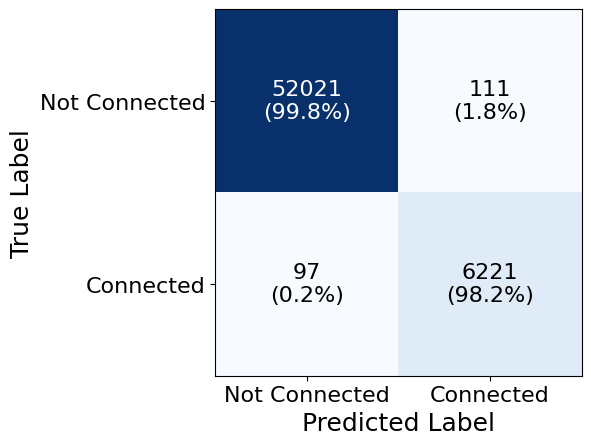

In [20]:
import sklearn
import matplotlib.pyplot as plt

con_mat = sklearn.metrics.confusion_matrix(flattened_label,flattened_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = sklearn.metrics.ConfusionMatrixDisplay(con_mat,display_labels=["Not Connected", "Connected"])
disp.plot(ax=ax, cmap='Blues', colorbar=False)
for text in ax.texts:  # Remove the default text annotations
    text.set_visible(False)

# Annotate the confusion matrix with both count and percentage
sums = np.sum(con_mat, axis=0)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        count = con_mat[i, j]
        total = sums[j]
        percentage = 100 * count / total
        if count > (sums[0] + sums[1])*0.7: #Change color of text if background too dark
            textcolor = 'white'
        else:
            textcolor = 'black'
        ax.text(j, i, f'{count}\n({percentage:.1f}%)',
                ha='center', va='center', fontsize=16, color=textcolor)

# Increase font size of tick labels
plt.xticks(fontsize=16)  # Increase x-axis tick label size
plt.yticks(fontsize=16)  # Increase y-axis tick label size

# Increase font size of axis labels
ax.set_xlabel('Predicted Label', fontsize=18)  # Increase x-axis label size
ax.set_ylabel('True Label', fontsize=18)       # Increase y-axis label size
plt.tight_layout()
plt.savefig("plots/confusion_matrix.png",dpi=100,bbox_inches="tight",transparent=True)

### Plot Example of Entry with Predicted Connection 

In [4]:
help(network_topology)

Help on function network_topology in module spine.vis.network:

network_topology(points, clusts, edge_index, clust_labels=None, edge_labels=None, mode='scatter', color=None, line=None, linewidth=2, name=None, **kwargs)
    Network 3D topological representation in Euclidean space.
    
    Parameters
    ----------
    points : np.ndarray
        (N, 3) array of N points of (..., x, y, z,...) coordinate information
    clusts : List[np.ndarray]
        (C) List of cluster indexes
    edge_index : np.ndarray
        (E, 2) List of connections between clusters
    clust_labels : np.ndarray, optional
        (C) List of cluster labels
    edge_labels : np.ndarray, optional
        (E) List of edge labels
    mode : str, default 'scatter'
        Drawing mode; one of 'circle', 'scatter', 'ellipsoid', 'cone' or 'hull'
    color : Union[str, np.ndarray], optional
        Color of clusters or (C) list of color of clusters
    line : dict, optional
        Line property dictionary
    linewidth

In [5]:
from spine.utils.globals import GROUP_COL
from spine.vis.network import network_topology
from spine.vis.layout import HIGH_CONTRAST_COLORS, layout3d

from plotly import graph_objs as go
from plotly.offline import iplot
import numpy as np

entry=6
data = reader[entry]

trace = []
CB_color_cycle = ['#332288','#117733', '#44AA99', '#88CCEE', 
                      '#EA4040','#0B57CB','#D79ABB','#7D7A7A','#D0B58F']

#Find predicted matches
mask = data['edge_pred'][:,1] > data['edge_pred'][:,0]
edge_index = data['edge_index'][mask]
print(edge_index)

#Print out if there is anything "wrong" with prediction
true_mask = (group_ids[data['edge_index'][:, 0]] == group_ids[data['edge_index'][:, 1]])
real = data["edge_index"][true_mask]
print(real)

for e in edge_index:
    if e not in real:
        print("PREDICTION wrong", e)
for r in real:
    if r not in edge_index:
        print("Real connection missing, should have", r)

### This line does the actual plotting! ###
trace+= network_topology(data['data'], data['clusts'], edge_index,clust_labels=data['group_pred'],
                       edge_labels=data['edge_pred'],
                       markersize=2, colorscale=CB_color_cycle,
                       name='')

fig = go.Figure(data=trace,layout=layout3d())

## Translate MINERvA units to this plot in cm
xmin = (-1080.0)
ymin = (-1450.0)
zmin = (-2400.0)
xmax = (1080.0) 
ymax = (1000.0) 
zmax = (3100.0)
offsetx, offsety, offsetz = 0.0, 218.33799743652344, 6913.0
xnum = int(math.ceil(abs((xmin - xmax)/3)))
ynum = int(math.ceil(abs((ymin - ymax)/3)))
znum = int(math.ceil(abs((zmin - zmax)/3)))
## Define the original ticks and their corresponding new values ##
original_xticks = np.linspace(0,xnum,5)
new_xticks = np.linspace(xmin,xmax,5)/10 #make mm to cm
original_yticks = np.linspace(0,ynum,10)
new_yticks = np.linspace(ymin,ymax,10)/10 #make mm to cm
original_zticks = np.linspace(0,znum,10)
new_zticks = np.linspace(zmin,zmax,10)/10 #make mm to cm

## All plot formatting!
fig.update_layout(
    scene=dict(
        xaxis=dict(
            tickvals=original_xticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_xticks],  # New labels for each tick
            title=dict(
                text="Horizontal Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12), 
        ),
        yaxis=dict(
            tickvals=original_yticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_yticks],  # New labels for each tick
            title=dict(
                text="Vertical Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12),
        ),
        zaxis=dict(
            tickvals=original_zticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_zticks],  # New labels for each tick
            title=dict(
                text="Beam Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12),
        )
    ),
    margin=dict(l=200, r=50, b=100, t=0),
    scene_camera=dict(
        eye=dict(x=-2, y=0.2, z=0.087),  # Adjust eye position
        up=dict(x=-0, y=20, z=0)  # Set the 'y' axis as the vertical axis
    )
)

# Add 2x2 and MINERvA boxes to the plot
x_2x2min=-639.31
x_2x2max=639.31
y_2x2min=-620.76
y_2x2max=620.76
z_2x2min=-645.38
z_2x2max=645.38
add_3d_box(fig,x_min=find_num_index(x_2x2min,xmin,xmax,xnum),x_max=find_num_index(x_2x2max,xmin,xmax,xnum),
           y_min=find_num_index(y_2x2min,ymin,ymax,ynum),y_max=find_num_index(y_2x2max,ymin,ymax,ynum),
           z_min=find_num_index(z_2x2min,zmin,zmax,znum),z_max=find_num_index(z_2x2max,zmin,zmax,znum))
draw_minerva(fig)

fig.update_layout(showlegend=False)
iplot(fig)

NameError: name 'reader' is not defined

#### Translates Indices to New 

In [29]:
def find_num_index(value, min_val, max_val, num):
    """
    Find the index in the num space given a value in the min/max space.
    
    Parameters:
    - value: The value in the min/max space.
    - min_val: The minimum value of the min/max space.
    - max_val: The maximum value of the min/max space.
    - num: The number of intervals or steps in the num space.
    
    Returns:
    - The corresponding index in the num space.
    """
    if value < min_val or value > max_val:
        raise ValueError("Value is out of bounds for the given min and max values.")
    
    num_index = int(((value - min_val) / (max_val - min_val)) * (num - 1))
    return num_index

In [30]:
def find_num_indices(values, min_val, max_val, num):
    """
    Find the indices in the num space for a list of values in the min/max space.
    
    Parameters:
    - values: A list of values in the min/max space.
    - min_val: The minimum value of the min/max space.
    - max_val: The maximum value of the min/max space.
    - num: The number of intervals or steps in the num space.
    
    Returns:
    - A list of indices in the num space.
    """
    if any(value < min_val or value > max_val for value in values):
        raise ValueError("Some values are out of bounds for the given min and max values.")
    
    num_indices = [
        int(((value - min_val) / (max_val - min_val)) * (num - 1))
        for value in values
    ]
    return num_indices

#### Bounding box for 2x2

In [26]:
import plotly.graph_objects as go

def add_3d_box(fig, x_min=-639.31, x_max=639.31, y_min=-620.76, y_max=620.76, z_min=-645.38, z_max=645.38):
    # Define the vertices of the box
    r = np.array([
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ])

    # Define the edges of the box
    edges = [
        [r[0], r[1], r[2], r[3], r[0]],  # Bottom face
        [r[4], r[5], r[6], r[7], r[4]],  # Top face
        [r[0], r[4]],  # Vertical edges
        [r[1], r[5]],
        [r[2], r[6]],
        [r[3], r[7]]
    ]

    # Create lines for the box
    for edge in edges:
        x_vals, y_vals, z_vals = zip(*edge)
        fig.add_trace(go.Scatter3d(
            x=x_vals, y=y_vals, z=z_vals,
            mode='lines',
            line=dict(color='black', width=2),
        ))

#### Bounding Box for MINERvA

In [27]:
def draw_minerva(fig,x_min =-1080.0, y_min = -1450.0, z_min = -2400.0,
                x_max = 1080.0, y_max = 1000.0, z_max = 3100.0,
                x_num=720 , y_num=817, z_num=1834):
    x_base = [0, 1080, 1080, 0, -1080, -1080]
    x_base = find_num_indices(x_base, x_min, x_max, x_num)
    shift = 2450
    y_base = [-3900 + shift, -3300 + shift, -2040 + shift, -1450 + shift, -2060 + shift, -3300 + shift]
    y_base = find_num_indices(y_base, y_min, y_max, y_num)
    
    z_base = {
        "ds": [1640, 3100],
        "us": [-2400, -1900]
    }
    z_base["ds"] = find_num_indices(z_base["ds"], z_min, z_max, z_num)
    z_base["us"] = find_num_indices(z_base["us"], z_min, z_max, z_num)


    # Plot the cylindrical hexagon
    for j in ["ds", "us"]:
        for i in range(len(x_base)):
            # Bottom face
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[(i + 1) % len(x_base)]],
                y=[y_base[i], y_base[(i + 1) % len(x_base)]],
                z=[z_base[j][0], z_base[j][0]],
                mode='lines',
                line=dict(color='black'),
            ))

            # Top face
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[(i + 1) % len(x_base)]],
                y=[y_base[i], y_base[(i + 1) % len(x_base)]],
                z=[z_base[j][1], z_base[j][1]],
                mode='lines',
                line=dict(color='black'),
            ))

            # Vertical edges
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[i]],
                y=[y_base[i], y_base[i]],
                z=[z_base[j][0], z_base[j][1]],
                mode='lines',
                line=dict(color='black'),
            ))

        